In [134]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
import string
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataMain = pd.read_csv('data/training_data.csv')

In [3]:
df = dataMain.copy()

In [4]:
le = preprocessing.LabelEncoder()

In [5]:
le.fit(df['category'])

LabelEncoder()

In [6]:
df['encoded_class'] = le.transform(df['category'])

In [7]:
print(df['category'].unique())

['None' 'Home & Kitchen' 'Tools & Home Improvement' 'Office Products'
 'Grocery & Gourmet Food' 'Electronics' 'Industrial & Scientific']


In [8]:
df

,title,category,encoded_class
0,The Three Amigos,None,4
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen,2
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement,6
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement,6
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products,5
...,...,...,...
20183,D0309-WML Leviton Decora Screwless Snap-On Wal...,None,4
20184,South Shore Axess Small 2-Door Storage Cabinet...,None,4
20185,Patriotic Flip Flop Ornament Assortment of 2,Home & Kitchen,2
20186,Cybrtrayd Life of the Party A116 Horse Chocola...,None,4


In [9]:
df.groupby('category').count()

,title,encoded_class
category,,
Electronics,191,191
Grocery & Gourmet Food,1102,1102
Home & Kitchen,4960,4960
Industrial & Scientific,588,588
None,10123,10123
Office Products,1144,1144
Tools & Home Improvement,2080,2080


In [10]:
def remove_regex(input_text, regex_pattern) :
    urls = re.finditer(regex_pattern, input_text)
    for i in urls :
        input_text = re.sub(i.group(), ' ', input_text)
    return input_text


def replace_regex(input_text, original_pattern, new_pattern) :
    urls = re.finditer(original_pattern, input_text)
    for i in urls :
        input_text = re.sub(i.group(), new_pattern, input_text)
    return input_text

In [11]:
model = spacy.load('en_core_web_md')
stopwords = model.Defaults.stop_words

In [12]:
def remove_regex(input_text, regex_pattern) :
    urls = re.finditer(regex_pattern, input_text)
    for i in urls :
        input_text = re.sub(i.group(), ' ', input_text)
    return input_text


def replace_regex(input_text, original_pattern, new_pattern) :
    urls = re.finditer(original_pattern, input_text)
    for i in urls :
        input_text = re.sub(i.group(), new_pattern, input_text)
    return input_text

In [13]:
def remove_punct(text) :
    PUNCT = set(string.punctuation)
    for i in text :
        if i in PUNCT :
            text = text.replace(i, ' ')
    return text

In [14]:
stopwords = model.Defaults.stop_words

def remove_stopwords(text) : 
    return ' '.join([i for i in text.split() if i not in stopwords])

In [15]:
def remove_adjectives(text) : 
    doc = model(text)
    text = []
    for token in doc :
        if token.pos_ not in ('ADJ', 'ADV') :
            text.append(token.lemma_)
        
    return ' '.join(text)

In [16]:
 def clean_data(input_text) :
    ptrn_multiple_spaces = '\s+'
    ptrn_alphanumerics = '[a-z]+[0-9]+[a-z]*|[0-9]+[a-z]+[0-9]*'
    ptrn_numbers = '[0-9]'

    text = input_text.lower()
    text = remove_punct(text)
    text = remove_regex(text, ptrn_alphanumerics)
    text = replace_regex(text, ptrn_numbers, ' ')
    text = replace_regex(text, ptrn_multiple_spaces, ' ')
    text = remove_stopwords(text)
    text = remove_adjectives(text)

    return(text)

In [17]:
df['cleaned_title'] = df['title'].apply(clean_data)

In [18]:
df.head(30)

,title,category,encoded_class,cleaned_title
0,The Three Amigos,None,4,amigo
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen,2,home essential glass style water goblet set
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement,6,cooper wire toggle switch pole light v ivory u...
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement,6,baseboarder reg wall bracket
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products,5,wave kanagawa custom rectangle mouse pad oblon...
5,Nemcor Pittsburgh Penguins NHL #1 Ultimate Fan...,Home & Kitchen,2,nemcor pittsburgh penguin nhl fan gold finger ...
6,"Patrician Berkley 5-Piece Comforter Set, King",None,4,berkley piece comforter set king
7,SouvNear 814614025003 Silver Color Deer Knob,None,4,souvnear silver color deer knob
8,20 Qty. Halco 50W MR16 FL 24V GU5.3 Prism EXN ...,Tools & Home Improvement,6,qty halco fl prism exn exn halogen flood lamp ...
9,Rilakkuma Bowl,None,4,bowl


In [19]:
count_vector = CountVectorizer()
train_count_vector = count_vector.fit_transform(df['cleaned_title'])

In [20]:
train_count_vector.shape

(20188, 19157)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(train_count_vector, df['encoded_class'], test_size=0.2, random_state=42, stratify = df['encoded_class'])

In [142]:
decisionTree = DecisionTreeClassifier(random_state=42, max_depth=40, min_samples_split = 2)

randomForest = RandomForestClassifier(n_estimators=100, max_depth=40)

naiveBayes = GaussianNB()

KNN = KNeighborsClassifier(n_neighbors=10)

models = [{
    'name' : 'Decision Tree',
    'model' : decisionTree
    },
    {
    'name' : 'RandomForest',
    'model' : randomForest
    },
    {
    'name' : 'KNN',
    'model' : KNN
    }
]

In [153]:
for algo in models :
    model = algo['model']
    
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    Y_pred_train = model.predict(X_train)


    recall_train = metrics.recall_score(Y_train, Y_pred_train, average=None)
    precision_train = metrics.precision_score(Y_train, Y_pred_train, average=None)
    f1_score_train = metrics.f1_score(Y_train, Y_pred_train, average=None)


    recall_test = metrics.recall_score(Y_test, Y_pred, average=None)
    precision_test = metrics.precision_score(Y_test, Y_pred, average=None)
    f1_score_test = metrics.f1_score(Y_test, Y_pred, average=None)



    labels = list(le.classes_)
    category_count = df.groupby('category').count()['encoded_class'] / df.shape[0]
    data = {'label' : labels, 
            'recall_train' : recall_train,
            'recall_test' : recall_test,
            'precision_train' : precision_train,
            'precision_test' : precision_test,
            'f1_score_train' : f1_score_train,
            'f1_score_test' : f1_score_test, 
            'count' : category_count
           }
    results = pd.DataFrame(data)
    algo['result'] = results

/home/aman.satyawali/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


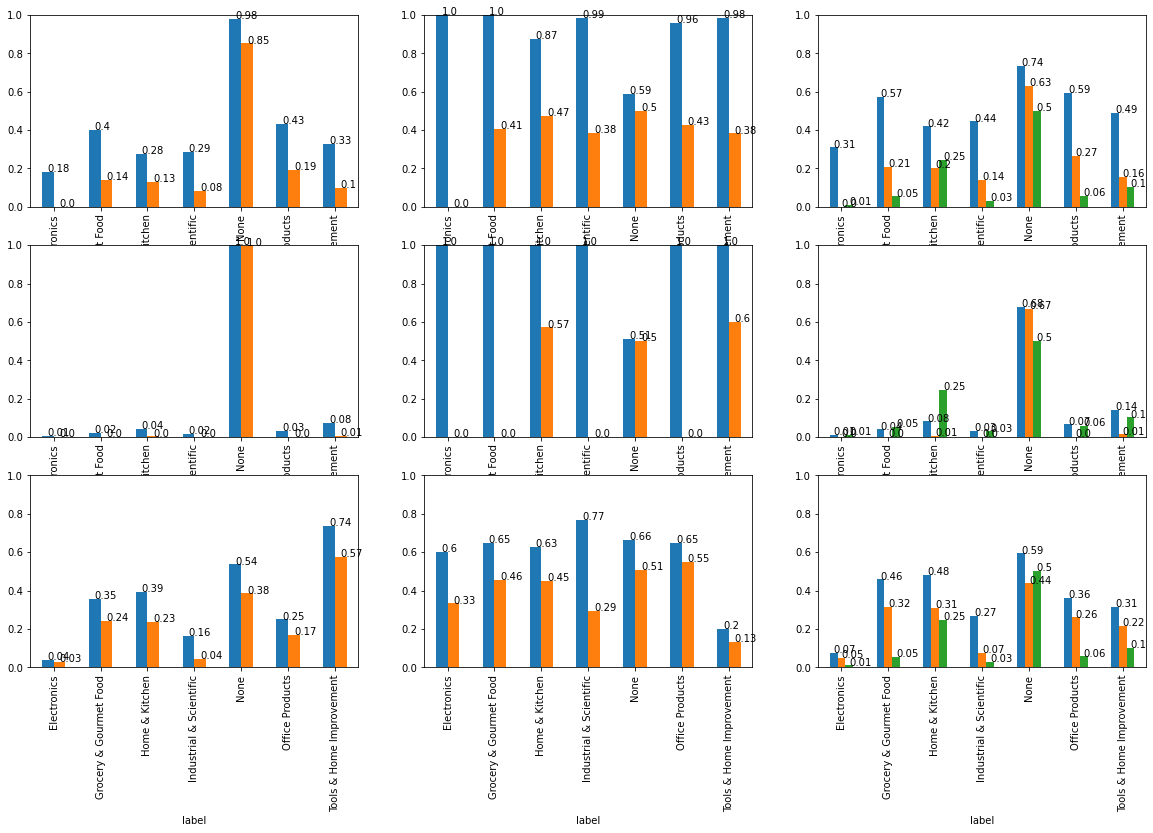

In [155]:
fig, ax = plt.subplots(len(models), 3, figsize = (20, 12))

for idx, algo in enumerate(models) :
    algo['result'].plot.bar(x = 'label', y = ['recall_train', 'recall_test'], rot = 90, ax = ax[idx][0], legend=False)
    for p in ax[idx][0].patches: 
        ax[idx][0].annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
    ax[idx][0].set_ylim([0,1])
        
    algo['result'].plot.bar(x = 'label', y = ['precision_train', 'precision_test'], rot = 90, ax = ax[idx][1], legend=False)
    for p in ax[idx][1].patches: 
        ax[idx][1].annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
    ax[idx][1].set_ylim([0,1])


    algo['result'].plot.bar(x = 'label', y = ['f1_score_train', 'f1_score_test', 'count'], rot = 90, ax = ax[idx][2], legend=False)
    for p in ax[idx][2].patches: 
        ax[idx][2].annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
    ax[idx][2].set_ylim([0,1])
        
        